<h1><center>Ecommerce Segmentation Analysis<center/><h1/>
<h2>April 2025<h2/>
Celine Ng


Table of Contents
1. Notebook Preparation
    1. Libraries Installation
    1. Data loading
2. Data Cleaning
3. EDA
4. RFM (identify high value customers)
5. Clustering algorithm (detect hidden patterns)

# 1. Notebook Preparation

## 1.1. Libraries Installation

In [220]:
from scipy.ndimage import histogram

from utils.eda import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. Data loading

In [221]:
data = pd.read_csv('data/data.csv')
data.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [222]:
data.shape

(1000, 28)

This dataset was obtained from
[Kaggle](https://www.kaggle.com/datasets/salahuddinahmedshuvo/ecommerce-consumer-behavior-analysis-data?resource=download),
in April 2025. This data contains 1000 rows and 28 columns including
information on purchasing patterns, demographics, product preferences,
customer satisfaction, and more.

For the purpose of this project, let's imagine this data was collected by a
small regional online shopping platform similar to *Amazon*, and our job is
 to help improve high-value customer segments and understand their
 demographics and behavior. With the goal of personalizing marketing
 strategies that increase customer engagement, loyalty, and revenue.
 Answering main questions like:
 - Who are our best customers?
- How can we reach them better?


**Initial plan**

The features can be separated into a few groups:
1. Demographics: Customer_ID, Age, Gender, Income_Level, Marital_Status,
Education_Level, Occupation, Location
2. Purchasing patterns: Purchase_Category, Purchase_Amount,
Frequency_of_Purchase, Purchase_Channel, Device_Used_for_Shopping,
Payment_Method, Time_of_Purchase, Discount_Used, Shipping_Preference
3. Other preferences: Brand_Loyalty, Return_Rate,
Customer_Loyalty_Program_Member, Purchase_Intent, Time_to_Decision
4. Marketing: Time_Spent_on_Product_Research(hours), Social_Media_Influence,
 Discount_Sensitivity, Engagement_with_Ads
5. Customer satisfaction: Product_Rating, Customer_Satisfaction


Segmentation Methods to apply:
- RFM (recency, frequency, monetary value)
- K-means (clustering algorithm)

# 2. Data Cleaning

In [223]:
data.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000.000000,744,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,1000,NaN,8,2,4,3,2,969,24,989,...,NaN,3,3,5,344,2,2,4,3,NaN
top,37-611-6911,NaN,Female,High,Widowed,Bachelor's,High,Oslo,Electronics,$178.04,...,NaN,High,Desktop,PayPal,3/3/2024,True,False,Need-based,No Preference,NaN
freq,1,NaN,452,515,260,341,517,4,54,2,...,NaN,270,350,219,8,521,509,256,372,NaN
mean,NaN,34.304000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.399000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.547000
std,NaN,9.353238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.868454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.035849
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,34.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


## 2.1. Duplicates

In [224]:
data['Customer_ID'].duplicated().any()

np.False_

## 2.2. Missing Values

In [225]:
missing_values(data)

,Missing Values,Percentage Missing,Datatype
Customer_ID,0,0.0,object
Age,0,0.0,int64
Gender,0,0.0,object
Income_Level,0,0.0,object
Marital_Status,0,0.0,object
Education_Level,0,0.0,object
Occupation,0,0.0,object
Location,0,0.0,object
Purchase_Category,0,0.0,object
Purchase_Amount,0,0.0,object


At this point there are several things worth noting down:
1. Only 2 features with missing values - Social_Media_Influence (24.7%),
Engagement_with_Ads (25.6%)
2. 8 unique values for gender, female is the most frequent answer
3. Most locations are unique - map it out, or change to country
4. Purchase amount needs to be converted to numerical
5. Time of purchase needs to be separate into more feature

2. age ranges between 18 - 50, with median being 34
4. 2 values for income, high being the most frequent
5. 4 values for martial state, widowed is the most frequent
6. 3 education levels, bachelor's is the most frequest
7. 2 occupations
9. 24 purchase categories
11. Frequency of purchase ranges between 2-12
12. 3 purchase channels
13. Brand loyalty between 1-5, mean being 3
14. Product rating between 1-5, mean being 3
15. Time spent researching product 0-2 (hours)
16. 3 values for social media influence, high being the most frequent
17. 3 values for Discount sensitivity, very sensitive the most frequent
18. Return rate 0-2
19. Customer satisfaction 0-10, 5 is median
20. Engagement with Ads 3 values, high is frequent
21. Device used for shopping 3 values,
22. 5 ways of Payment method

1. pattern with missing values? same users
2. clean up genders
3.

In [226]:
missing_smi = data[data["Social_Media_Influence"].isna()]
missing_smi.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,247,247.000000,247,247,247,247,247,247,247,247,...,247.000000,180,247,247,247,247,247,247,247,247.000000
unique,247,NaN,8,2,4,3,2,246,24,245,...,NaN,3,3,5,183,2,2,4,3,NaN
top,37-611-6911,NaN,Female,Middle,Single,Master's,High,Créteil,Sports & Outdoors,$378.87,...,NaN,High,Tablet,Debit Card,8/12/2024,True,True,Wants-based,No Preference,NaN
freq,1,NaN,120,125,65,87,126,2,17,2,...,NaN,63,92,56,4,138,125,66,89,NaN
mean,NaN,34.716599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.514170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.757085
std,NaN,9.609481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.935416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.214486
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000


In [227]:
missing_ewa = data[data["Engagement_with_Ads"].isna()]
missing_ewa.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,256,256.000000,256,256,256,256,256,256,256,256,...,256.000000,0,256,256,256,256,256,256,256,256.000000
unique,256,NaN,8,2,4,3,2,252,24,256,...,NaN,0,3,5,182,2,2,4,3,NaN
top,37-611-6911,NaN,Female,Middle,Widowed,Master's,High,Marseille,Home Appliances,$333.80,...,NaN,NaN,Tablet,Cash,2/9/2024,False,False,Impulsive,No Preference,NaN
freq,1,NaN,115,130,74,89,134,2,17,1,...,NaN,NaN,91,58,4,136,133,77,94,NaN
mean,NaN,34.816406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.441406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.343750
std,NaN,9.435513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.840271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.196053
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
75%,NaN,42.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [228]:
missing_smi["Customer_ID"].isin(missing_ewa["Customer_ID"]).sum()

np.int64(67)

Missing values seem to random and do not belong to a specific group of
customers.

## 2.3. Odd Data/Data Type

**Genders**

In [229]:
data["Gender"].value_counts()

Gender
Female         452
Male           449
Bigender        20
Agender         19
Genderfluid     17
Non-binary      16
Polygender      15
Genderqueer     12
Name: count, dtype: int64

In [230]:
data_data_cleaning = data.copy()
majority = ["Female", "Male"]
data_data_cleaning.Gender =\
    data_data_cleaning.Gender.apply(lambda x: x if x in majority else 'other')

Majority of customers are Female and Male. To simplify the outliers, let's
group them all under 1 category "other".

In [231]:
data_data_cleaning.Gender.value_counts()

Gender
Female    452
Male      449
other      99
Name: count, dtype: int64

**Purchase Amount**

In [232]:
data_data_cleaning['Purchase_Amount'] = \
    (data_data_cleaning['Purchase_Amount'].str.replace('$', '', regex=False))


In [233]:
data_data_cleaning['Purchase_Amount'] = pd.to_numeric(data_data_cleaning['Purchase_Amount'])
data_data_cleaning['Purchase_Amount'].dtype

dtype('float64')

# 3. EDA

## 3.1. Overview

1. Customer_ID: Unique identifier for each customer.
2. Age: Customer's age (integer).
3. Gender: Customer's gender (categorical: Male, Female, Non-binary, Other).
4. Income_Level: Customer's income level (categorical: Low, Middle, High).
5. Marital_Status: Customer's marital status (categorical: Single, Married,
Divorced, Widowed).
6. Education_Level: Highest level of education completed (categorical: High
School, Bachelor's, Master's, Doctorate).
7. Occupation: Customer's occupation (categorical: Various job titles).
8. Location: Customer's location (city, region, or country).
9. Purchase_Category: Category of purchased products (e.g., Electronics,
Clothing, Groceries).
10. Purchase_Amount: Amount spent during the purchase (decimal).
11. Frequency_of_Purchase: Number of purchases made per month (integer).
12. Purchase_Channel: The purchase method (categorical: Online, In-Store,
Mixed).
13. Brand_Loyalty: Loyalty to brands (1-5 scale).
14. Product_Rating: Rating given by the customer to a purchased product (1-5
scale).
15. Time_Spent_on_Product_Research: Time spent researching a product (integer,
hours or minutes).
16. Social_Media_Influence: Influence of social media on purchasing decision
(categorical: High, Medium, Low, None).
17. Discount_Sensitivity: Sensitivity to discounts (categorical: Very
Sensitive, Somewhat Sensitive, Not Sensitive).
18. Return_Rate: Percentage of products returned (decimal).
19. Customer_Satisfaction: Overall satisfaction with the purchase (1-10 scale).
20. Engagement_with_Ads: Engagement level with advertisements (categorical:
High, Medium, Low, None).
21. Device_Used_for_Shopping: Device used for shopping (categorical:
Smartphone, Desktop, Tablet).
22. Payment_Method: Method of payment used for the purchase (categorical:
Credit Card, Debit Card, PayPal, Cash, Other).
23. Time_of_Purchase: Timestamp of when the purchase was made (date/time).
24. Discount_Used: Whether the customer used a discount (Boolean: True/False).
25. Customer_Loyalty_Program_Member: Whether the customer is part of a loyalty
program (Boolean: True/False).
26. Purchase_Intent: The intent behind the purchase (categorical: Impulsive,
Planned, Need-based, Wants-based).
27. Shipping_Preference: Shipping preference (categorical: Standard, Express,
No Preference).
28. Payment_Frequency: Frequency of payment (categorical: One-time,
Subscription, Installments).
29. Time_to_Decision: Time taken from consideration to actual purchase (in
days).

Let's look at the data distribution

In [234]:
data_distribution = data_data_cleaning.drop(columns = ['Customer_ID',
                                                       'Location', 'Time_of_Purchase'])

feature_demographic = ['Age', 'Gender', 'Income_Level',
                       'Marital_Status', 'Education_Level', 'Occupation']
feature_purchase_pattern = ['Purchase_Category', 'Purchase_Amount',
                            'Frequency_of_Purchase', 'Purchase_Channel', 'Device_Used_for_Shopping',
                            'Payment_Method', 'Purchase_Intent',
                            'Time_to_Decision',
                            'Time_Spent_on_Product_Research(hours)', 'Shipping_Preference']
feature_marketing = ['Social_Media_Influence', 'Discount_Sensitivity',
                     'Discount_Used', 'Engagement_with_Ads']
feature_customer_satisfaction = ['Product_Rating', 'Customer_Satisfaction', 'Brand_Loyalty', 'Return_Rate',
                                 'Customer_Loyalty_Program_Member']

num_cols = data_distribution.select_dtypes(include='number').columns

**Demographic**

In [235]:
demographic_num = []
demographic_cat = []
for col in feature_demographic:
    if col in num_cols:
        demographic_num.append(col)
    else:
        demographic_cat.append(col)
print(len(demographic_num))
print(len(demographic_cat))

1
5


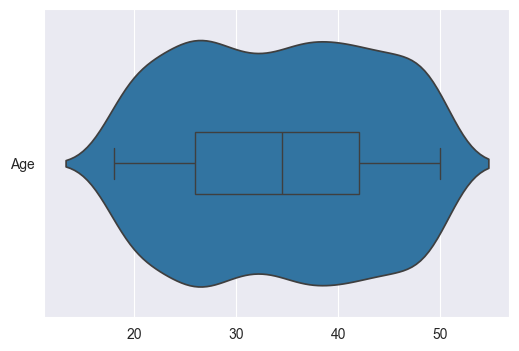

In [236]:
plt.figure(figsize = (6, 4))
violin_boxplot(data=data_distribution, columns=demographic_num)

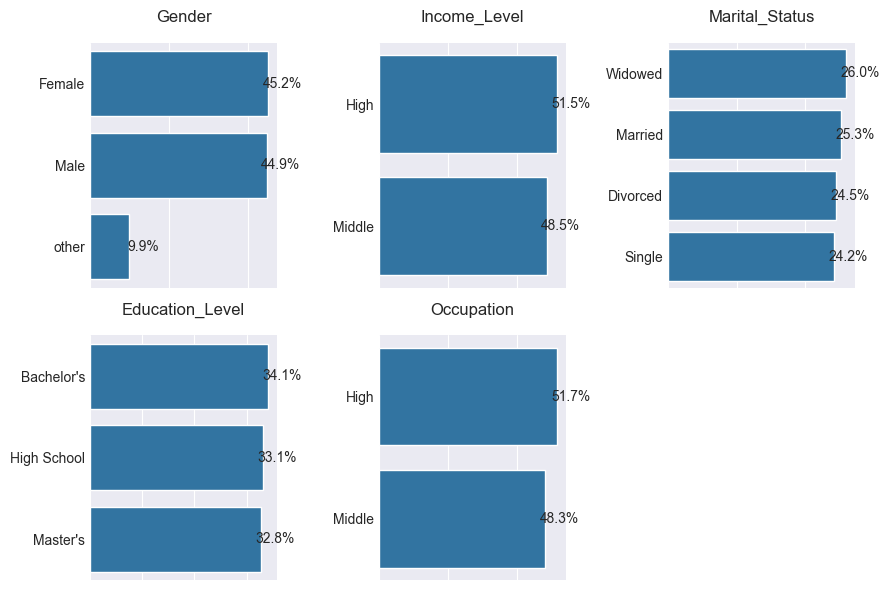

In [237]:
percentage_subplots(data=data_distribution, columns=demographic_cat, nrows=2,
                    ncols=3)

The surveyed population are on:
1. the higher end of income earners
2. the higher education degrees (considering that only 14% of US citizen
have master's completed)

**Purchase Pattern**

In [238]:
purchase_pattern_num = []
purchase_pattern_cat = []
for col in feature_purchase_pattern:
    if col in num_cols:
        purchase_pattern_num.append(col)
    else:
        purchase_pattern_cat.append(col)
print(len(purchase_pattern_num))
print(len(purchase_pattern_cat))

4
6


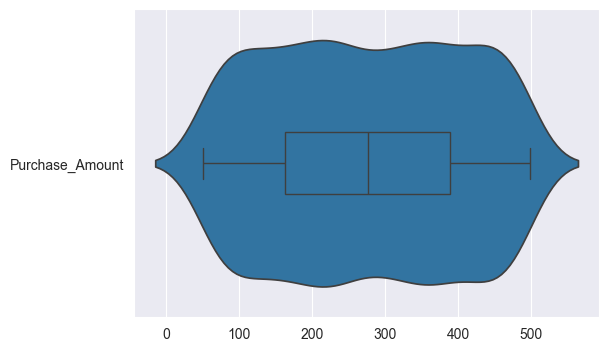

In [239]:
fig = plt.figure(figsize = (6, 4))
violin_boxplot(data=data_distribution, columns=['Purchase_Amount'])

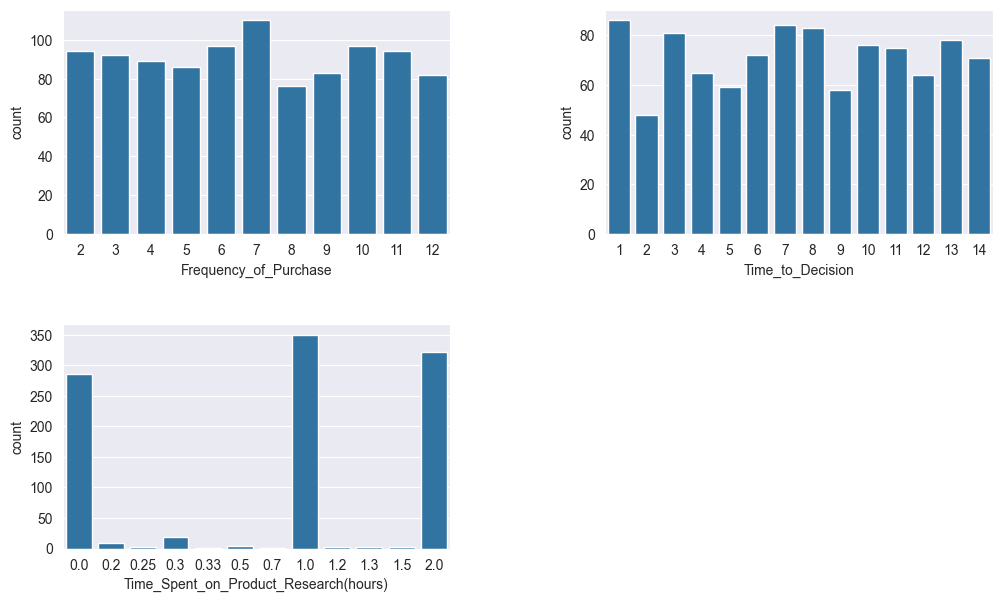

In [240]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes_flatten = axes.flatten()

for i, col in enumerate(['Frequency_of_Purchase', 'Time_to_Decision',
                         'Time_Spent_on_Product_Research(hours)']):
    sns.countplot(data=data_distribution, x=col, ax=axes_flatten[i])

axes_flatten[3].clear()
axes_flatten[3].axis('off')
plt.show()

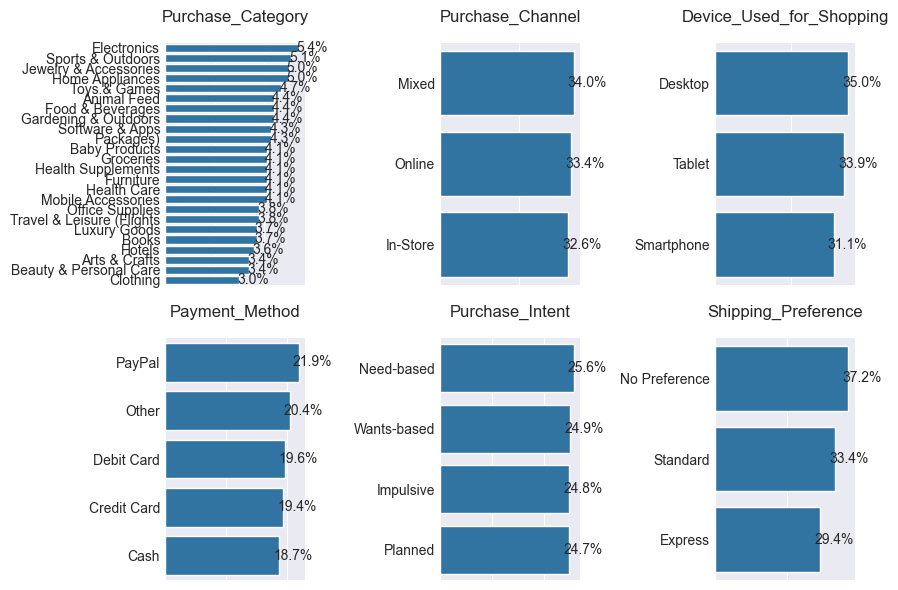

In [241]:
percentage_subplots(data=data_distribution, columns=purchase_pattern_cat, nrows=2,
                    ncols=3)

1. Both stores and online sales are equally important, so are all the
devices used for shopping
2. Only 19% cash customers, with over 60% paying with card methods.

**Marketing**

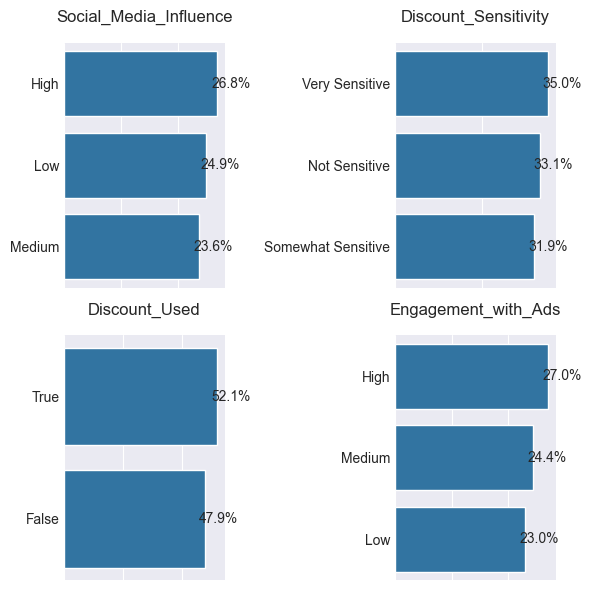

In [242]:
percentage_subplots(data=data_distribution, columns=feature_marketing, nrows=2,
                    ncols=2)

Surveyed customers are in general sensitive to  all marketing schemes
(social media, discount, and advertisement), with more than 2/3
react somewhat positively towards all strategies.

**Customer Satisfaction**

In [243]:
customer_satisfaction_num = ['Product_Rating', 'Customer_Satisfaction', 'Brand_Loyalty',]

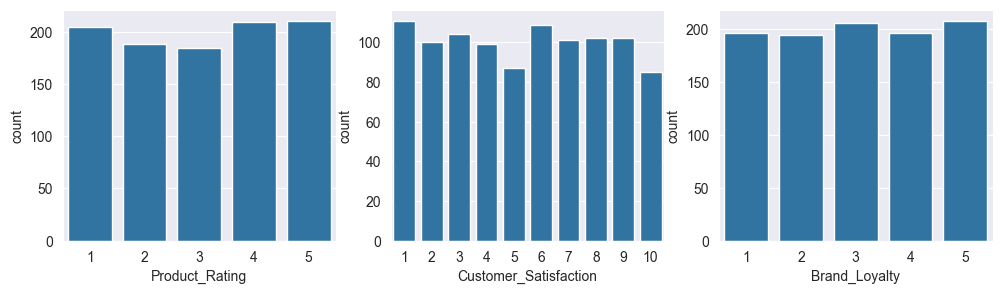

In [244]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12, 3))
axes_flatten = axes.flatten()

for i, col in enumerate(customer_satisfaction_num):
    sns.countplot(data=data_distribution, x=col, ax=axes_flatten[i])

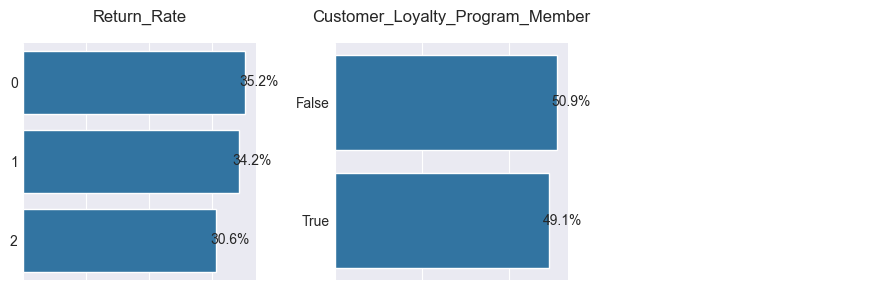

In [245]:
percentage_subplots(data=data_distribution,
                    columns=['Return_Rate',
                             'Customer_Loyalty_Program_Member'], nrows=1,
                    ncols=3)

1. Product rating, customer satisfaction, and brand loyalty are all spread
out similarly.
2. Over 60% of products gets returned
3. Slightly under half of the customer are on the customer loyalty program

A brief overview of the data distribution shows that the population is
diverse, as most features are equally distributed over all response.

The numerical features 'Time_to_Decision', 'Time_Spent_on_Product_Research (hours)', 'Product_Rating', and 'Customer_Satisfaction' show a distribution where extreme values are more common than those in the middle. For instance, users often report spending 0, 1, or 2 hours on product research, while values like 0.3 or 1.5 hours are rare. Since this pattern is especially strong in the first two features, grouping these values into buckets can help reduce noise and improve analysis.

**Bucketing Features**

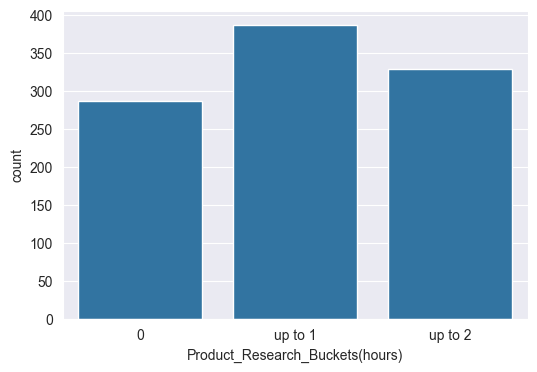

In [246]:
bins = [-0.1, 0, 1, 2]
labels = ['0', 'up to 1', 'up to 2']
data_distribution['Product_Research_Buckets(hours)'] = (pd.cut
                                                        (data_distribution['Time_Spent_on_Product_Research(hours)'], bins=bins, labels=labels))
fig = plt.figure(figsize = (6, 4))
sns.countplot(data=data_distribution, x='Product_Research_Buckets(hours)')
plt.show()

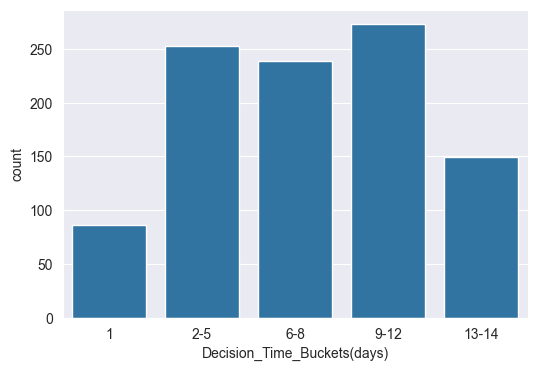

In [247]:
bins = [0, 1, 5, 8, 12, 14]
labels = ['1', '2-5', '6-8', '9-12', '13-14']
data_distribution['Decision_Time_Buckets(days)'] = (pd.cut
                                                    (x=data_distribution['Time_to_Decision'], bins=bins, labels=labels))
fig = plt.figure(figsize = (6, 4))
sns.countplot(data=data_distribution, x='Decision_Time_Buckets(days)')
plt.show()

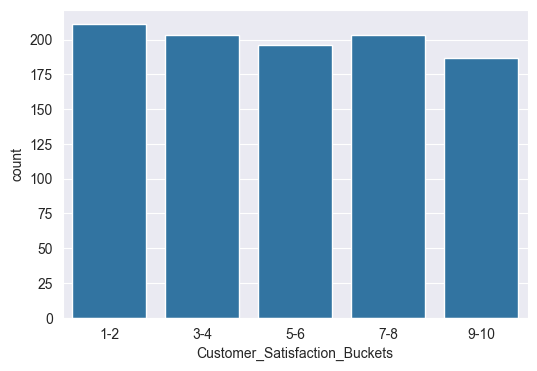

In [248]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['1-2', '3-4', '5-6', '7-8', '9-10']
data_distribution['Customer_Satisfaction_Buckets'] = (pd.cut
                                              (data_distribution['Customer_Satisfaction'], bins=bins, labels=labels))
fig = plt.figure(figsize = (6, 4))
sns.countplot(data=data_distribution, x='Customer_Satisfaction_Buckets')
plt.show()

<div class="alert alert-block alert-info">
<b>Section Summary:</b> The surveyed population is diverse distribution of
most features, regardless of the type of information. some observed patterns
 include...

*Demographics*
1. the higher end of income earners
2. the higher education degrees (considering that only 14% of US citizen
have master's completed)

*Purchase Pattern*
1. Buyers purchases on median 6 times a month
2. take their time to decide and research products
3. Both stores and online sales are equally important, so are all the
devices used for shopping
4. Only 19% cash customers, with over 60% paying with card methods.

*Marketing*\
Surveyed customers are in general sensitive to  all marketing schemes
(social media, discount, and advertisement), with more than 2/3
react somewhat positively towards all strategies.

*Customer Satisfaction*
1. Product rating, customer satisfaction, and brand loyalty are all spread
out similarly.
2. Over 60% of products gets returned
3. Slightly under half of the customer are on the customer loyalty program

</div>

## 3.2. Time and Location of Purchase

In [249]:
data_distribution['month_of_purchase'] = (pd.to_datetime(data['Time_of_Purchase']).dt
                                .month)

<Axes: xlabel='month_of_purchase', ylabel='count'>

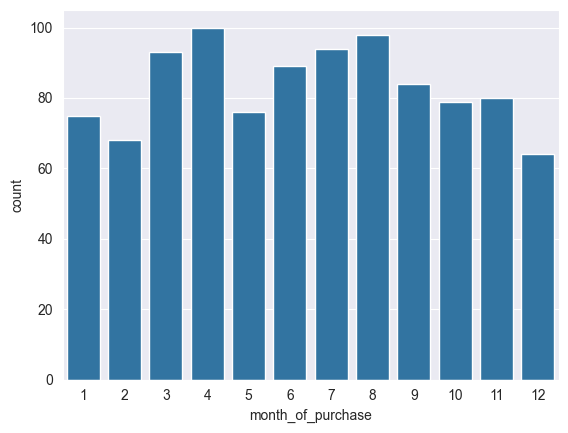

In [250]:
sns.countplot(data=data_distribution, x='month_of_purchase')

## 3.3. Relationships

goal: understand top spenders

R - purchase date
F - Frequency of Purchase
M - Purchase amount

Using these features as base feature to compare information

Hypothetical correlated features with top spenders - Income,

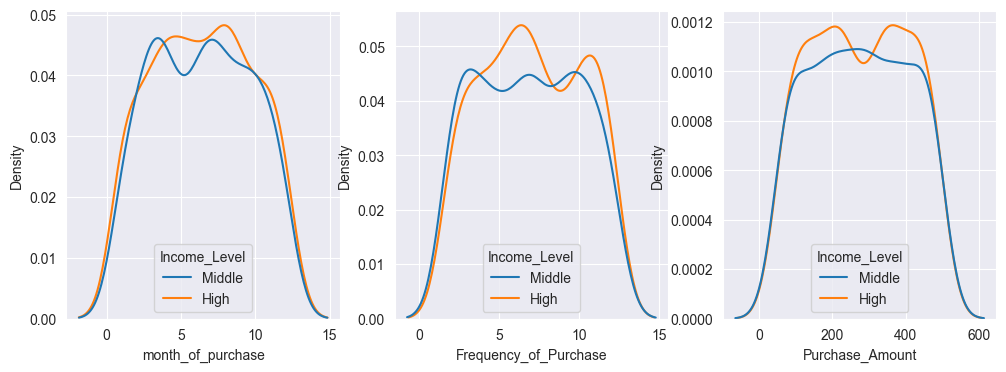

In [251]:
rfm_features = ['month_of_purchase', 'Frequency_of_Purchase',
                'Purchase_Amount']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))
axes_flatten = axes.flatten()
for i, col in enumerate(rfm_features):
    sns.kdeplot(data=data_distribution, x=col, hue='Income_Level', ax=axes_flatten[i])


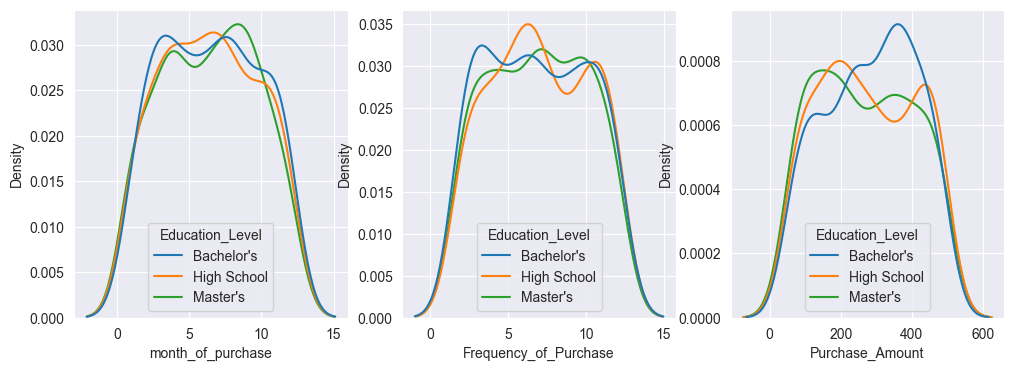

In [252]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))
axes_flatten = axes.flatten()
for i, col in enumerate(rfm_features):
    sns.kdeplot(data=data_distribution, x=col, hue='Education_Level',
                ax=axes_flatten[i])

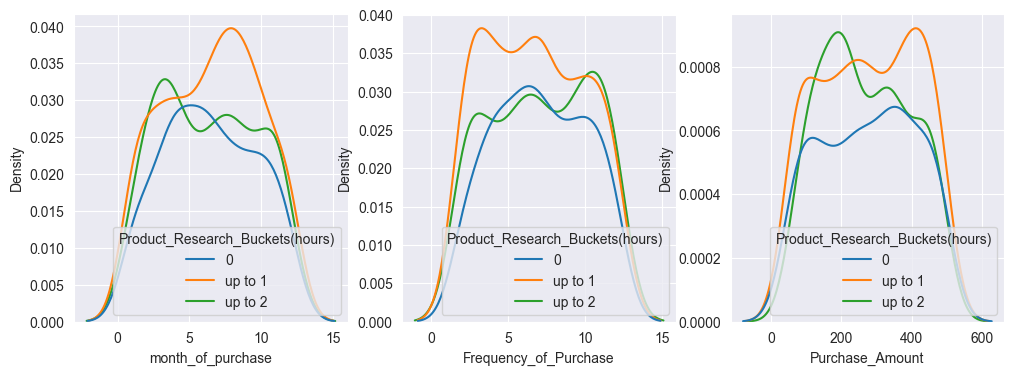

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))
axes_flatten = axes.flatten()
for i, col in enumerate(rfm_features):
    sns.kdeplot(data=data_distribution, x=col, hue='Product_Research_Buckets(hours)',
                ax=axes_flatten[i])

# 4. RFM Analysis
**Objective:** <br>
Segment and identify valuable customers based on their
recency,
frequency and monetary values for the business. Based on this analysis,
provide an overview of customer segments and recommendations on actions for
each segment.

In [259]:
data_rfm = data[['Time_of_Purchase', 'Frequency_of_Purchase', 'Purchase_Amount']]
data_rfm.to_csv('data/data_rfm.csv', index=False)